Accuracy without Scaling: 1.0
Accuracy with Standardization: 1.0
Accuracy with Min-Max Scaling: 0.9666666666666667


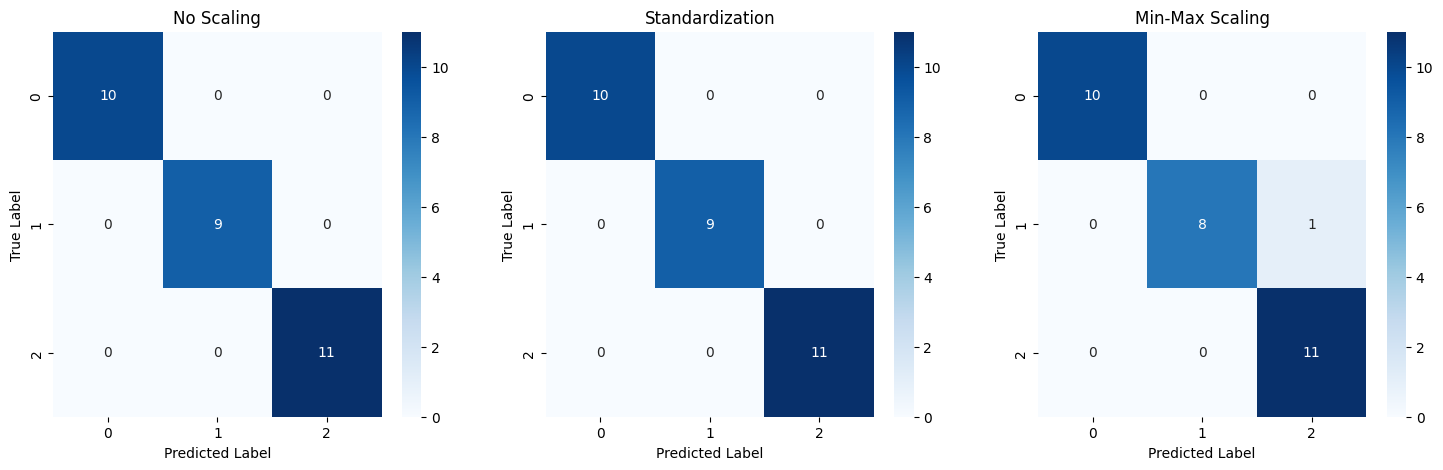


Discussion Questions:
1. Which scaling technique performed better and why?
2. Why is feature scaling important in machine learning?

Lasso Regression Coefficients (L1 Regularization):
[   0.         -152.66477923  552.69777529  303.36515791  -81.36500664
   -0.         -229.25577639    0.          447.91952518   29.64261704]

Ridge Regression Coefficients (L2 Regularization):
[  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]


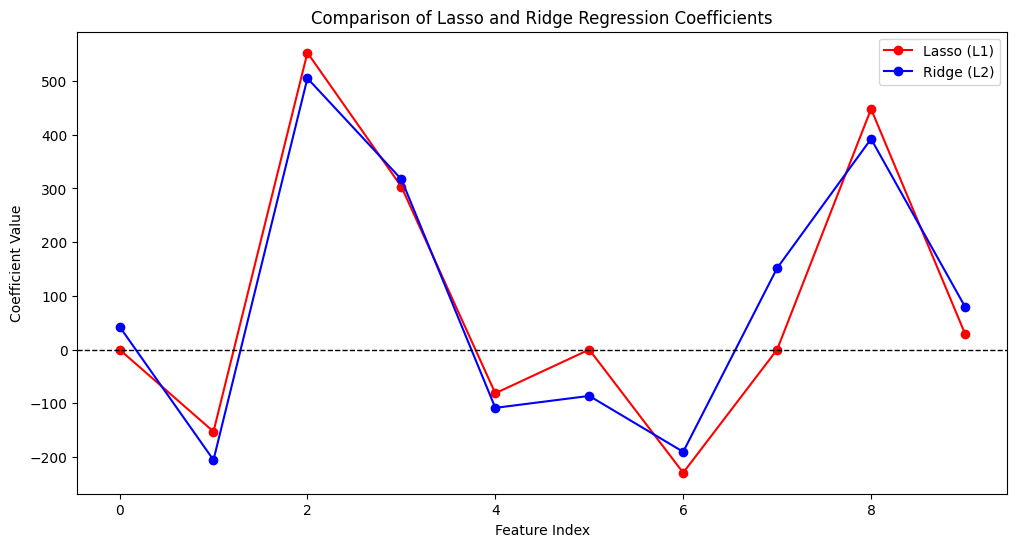

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_diabetes
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -------------------------------
# PART 1: Feature Scaling & Model Performance Evaluation
# -------------------------------

# Load Iris Dataset
iris = load_iris()
X, y = iris.data, iris.target

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train Logistic Regression Without Scaling
model_no_scaling = LogisticRegression(max_iter=200)
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)

# 2. Train Logistic Regression With Standardization
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

model_standard = LogisticRegression(max_iter=200)
model_standard.fit(X_train_standard, y_train)
y_pred_standard = model_standard.predict(X_test_standard)

# 3. Train Logistic Regression With Normalization (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

model_minmax = LogisticRegression(max_iter=200)
model_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = model_minmax.predict(X_test_minmax)

# Evaluate Performance (Accuracy)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
accuracy_standard = accuracy_score(y_test, y_pred_standard)
accuracy_minmax = accuracy_score(y_test, y_pred_minmax)

# Print Accuracy Scores
print("Accuracy without Scaling:", accuracy_no_scaling)
print("Accuracy with Standardization:", accuracy_standard)
print("Accuracy with Min-Max Scaling:", accuracy_minmax)

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cm_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)
cm_standard = confusion_matrix(y_test, y_pred_standard)
cm_minmax = confusion_matrix(y_test, y_pred_minmax)

titles = ["No Scaling", "Standardization", "Min-Max Scaling"]
cms = [cm_no_scaling, cm_standard, cm_minmax]

for i, ax in enumerate(axes):
    sns.heatmap(cms[i], annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.show()

# Discussion Questions:
print("\nDiscussion Questions:")
print("1. Which scaling technique performed better and why?")
print("2. Why is feature scaling important in machine learning?")

# -------------------------------
# PART 2: Regularization Techniques (Lasso & Ridge Regression)
# -------------------------------

# Load Diabetes Dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Train Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Print Coefficients
print("\nLasso Regression Coefficients (L1 Regularization):")
print(lasso.coef_)

print("\nRidge Regression Coefficients (L2 Regularization):")
print(ridge.coef_)

# Plot Coefficients for Lasso & Ridge
plt.figure(figsize=(12, 6))
plt.plot(lasso.coef_, 'ro-', label="Lasso (L1)")
plt.plot(ridge.coef_, 'bo-', label="Ridge (L2)")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Lasso and Ridge Regression Coefficients")
plt.show()